In [7]:
import os
import sys
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import pandas as pd
from tqdm import tqdm
import numpy as np
from scipy.stats import pearsonr, spearmanr
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from importlib import reload
import matplotlib.pyplot as plt
import calplot

In [8]:
sys.path.append("../../src")
import main

In [10]:
# read in fraction of day and night
temp = pd.read_csv('../../data/processed_data/temp_synoptic_controls_2024.csv')

In [11]:
temp

,datetime,station_id,ta,vp,datetime_UTC,value,sunrise,sunset,solar_noon,nadir,date,synoptically controlled,fraction_of_day,fraction_of_night
0,2022-09-01 00:00:00+00:00,FRASHA,14.629891,1.441245,2022-09-01 00:00:00+00:00,14.629891,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
1,2022-09-01 00:00:00+00:00,FRBETZ,16.713000,1.459968,2022-09-01 00:00:00+00:00,16.713000,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
2,2022-09-01 00:00:00+00:00,FRBRUH,16.285000,1.484469,2022-09-01 00:00:00+00:00,16.285000,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
3,2022-09-01 00:00:00+00:00,FRDIET,13.840833,1.580545,2022-09-01 00:00:00+00:00,13.840833,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
4,2022-09-01 00:00:00+00:00,FRDREI,16.611667,1.495245,2022-09-01 00:00:00+00:00,16.611667,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736885,2024-09-01 00:00:00+00:00,FRWEIN,21.804667,1.974577,2024-09-01 00:00:00+00:00,21.804667,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00,2024-09-01,yes,0.0,0.545624
736886,2024-09-01 00:00:00+00:00,FRWILD,19.727333,2.296735,2024-09-01 00:00:00+00:00,19.727333,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00,2024-09-01,yes,0.0,0.545624
736887,2024-09-01 00:00:00+00:00,FRWITT,22.871000,1.939729,2024-09-01 00:00:00+00:00,22.871000,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00,2024-09-01,yes,0.0,0.545624
736888,2024-09-01 00:00:00+00:00,FRWSEE,20.290667,2.013700,2024-09-01 00:00:00+00:00,20.290667,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00,2024-09-01,yes,0.0,0.545624


In [12]:
def find_closest_to_perc(df, column_name, percentage=0.5):
    df['Date'] = df['Time'].dt.date
    df['Date'] = df['Date'].astype(str)
    list = []
    for date in df['Date'].unique():
        # Convert the column to a numpy array for faster computation
        values = df[df['Date'] == date][column_name]
        # Find the closest value using numpy
        closest_value = (values - percentage).abs().idxmin()
        list.append(closest_value)
    return df.loc[list]

In [13]:
# from spider_plot_eval
season='year'

In [14]:
def plot_calplot(year, var, radius, hour=None, fraction_of_day=None, fraction_of_night=None):

    stats_dict = pd.read_csv(f'../../data/processed_data/2024/stats_timesteps_{var}_{season}_{radius}.csv')
    stats_dict['Time'] = pd.to_datetime(stats_dict['Time'])

    date_to_fraction_of_day = temp.set_index('datetime_UTC')['fraction_of_day'].to_dict()
    day_to_fraction_of_night = temp.set_index('datetime_UTC')['fraction_of_night'].to_dict()
    stats_dict['fraction_of_day'] = stats_dict['Time'].astype(str).map(date_to_fraction_of_day)
    stats_dict['fraction_of_night'] = stats_dict['Time'].astype(str).map(day_to_fraction_of_night)
    stats_dict.to_csv(f'../../data/processed_data/calplot_data/{var}_300_fraction_of_night.csv')

    # select relevant hours
    if hour is not None:
        stats_dict_13 = stats_dict[stats_dict['Time'].dt.hour == hour]
        keyword = 'hour' + str(hour)
    if fraction_of_day is not None:
        # for each day, find fraction closest to fraction_of_day
        stats_dict_13 = find_closest_to_perc(stats_dict, 'fraction_of_day', percentage=fraction_of_day)
        keyword = 'day' + str(fraction_of_day)
    if fraction_of_night is not None:
        stats_dict_13 = find_closest_to_perc(stats_dict, 'fraction_of_night', percentage=fraction_of_night)
        keyword = 'night' + str(fraction_of_night)
        title = 'fraction of night: ' + str(fraction_of_night)
        
    stats_dict_13 = stats_dict_13.drop(columns=['Unnamed: 0','Parameter.1'])
    stats_dict_13.index = stats_dict_13['Time'].dt.date
    stats_dict_13.index = pd.to_datetime(stats_dict_13.index)

    stats_dict_13['Time'] = stats_dict_13['Time'].dt.date.astype(str)
    # Create a mapping dictionary from temp DataFrame
    date_to_synoptic = temp.set_index('date')['synoptically controlled'].to_dict()

    # Map the synoptic_control values to stats_dict_13 based on the date column
    stats_dict_13['synoptically controlled'] = stats_dict_13['Time'].map(date_to_synoptic)
    stats_dict_13['synoptic_control'] = stats_dict_13['synoptically controlled'].apply(lambda x: 1 if x == 'yes' else '0')
    stats_dict_13['synoptic_control'] = stats_dict_13['synoptic_control'].astype(int)

    #stats_dict_13.loc[stats_dict_13['Spearman p-value'] > 0.05, 'Spearman Correlation'] = np.nan

    print(f'Spearman correlation at {hour}')
    calplot.calplot(stats_dict_13['Spearman Correlation'], cmap='pink_r',vmin=0,vmax=0.8)
    plt.title(title)
    plt.savefig(f'../../figures/fig8/{keyword}_spearman_{var,radius}.png',bbox_inches='tight', dpi=300)
    plt.savefig(f'../../figures/fig8/{keyword}_spearman_{var,radius}.svg',bbox_inches='tight', dpi=300)
    plt.show()

    print(f'Spearman p-value at {hour}')
    calplot.calplot(stats_dict_13['Spearman p-value'], cmap='pink',vmin=0,vmax=1)
    plt.title(title)
    plt.savefig(f'../../figures/fig8/{keyword}_p_value_{var,radius}.png',bbox_inches='tight')
    plt.savefig(f'../../figures/fig8/{keyword}_p_value_{var,radius}.svg',bbox_inches='tight')
    plt.show()

    print('Synoptic control')
    calplot.calplot(stats_dict_13['synoptic_control'], cmap='binary',vmin=0,vmax=1)
    plt.show()

    return stats_dict_13
"""
    print('Temp. Std. Dev.')
    calplot.calplot(stats_dict_13['Temp. Std. Dev.'], cmap='RdBu_r', vmin=0, vmax=2)
    plt.title(title)
    plt.savefig(f'../../figures/calplot/{keyword}_temp_std_{var,radius}.png',bbox_inches='tight')
    plt.show()

    print('UHI Magnitude')
    calplot.calplot(stats_dict_13['UHI Magnitude'], cmap='RdBu_r')
    plt.title(title)
    plt.savefig(f'../../figures/calplot/{keyword}_uhi_mag_{var,radius}.png',bbox_inches='tight')
    plt.show()
"""

"\n    print('Temp. Std. Dev.')\n    calplot.calplot(stats_dict_13['Temp. Std. Dev.'], cmap='RdBu_r', vmin=0, vmax=2)\n    plt.title(title)\n    plt.savefig(f'/Users/lisawink/Documents/paper1/figures/calplot/{keyword}_temp_std_{var,radius}.png',bbox_inches='tight')\n    plt.show()\n\n    print('UHI Magnitude')\n    calplot.calplot(stats_dict_13['UHI Magnitude'], cmap='RdBu_r')\n    plt.title(title)\n    plt.savefig(f'/Users/lisawink/Documents/paper1/figures/calplot/{keyword}_uhi_mag_{var,radius}.png',bbox_inches='tight')\n    plt.show()\n"

Spearman correlation at None


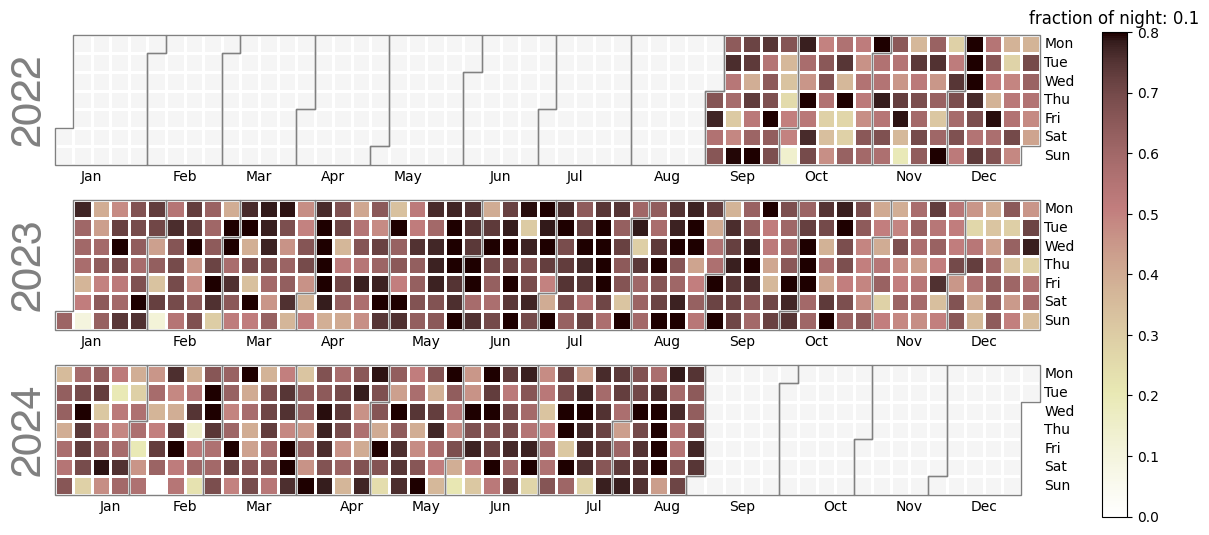

Spearman p-value at None


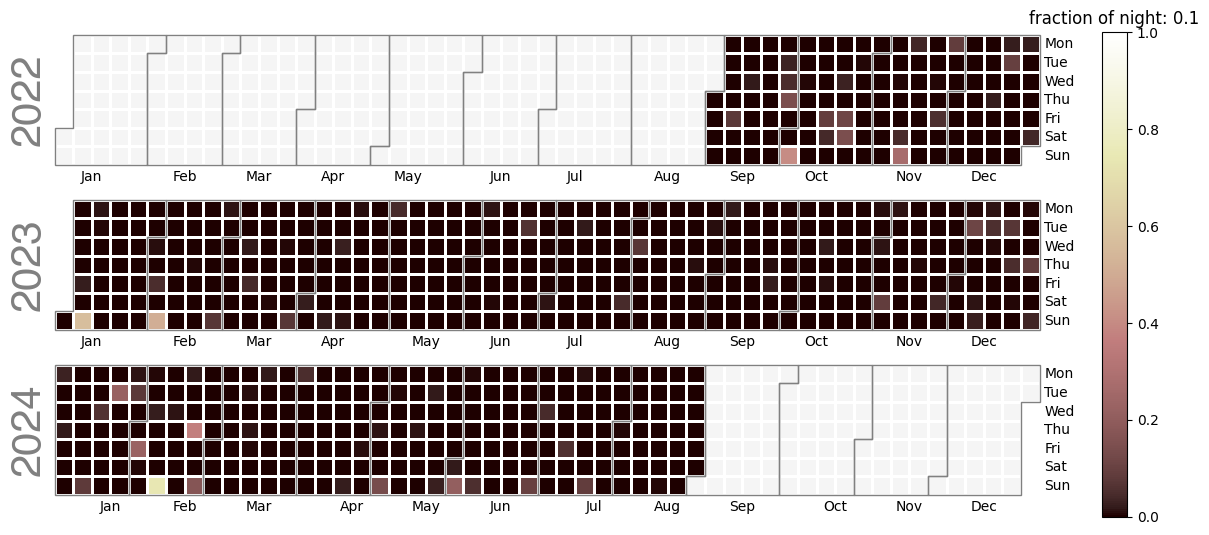

Synoptic control


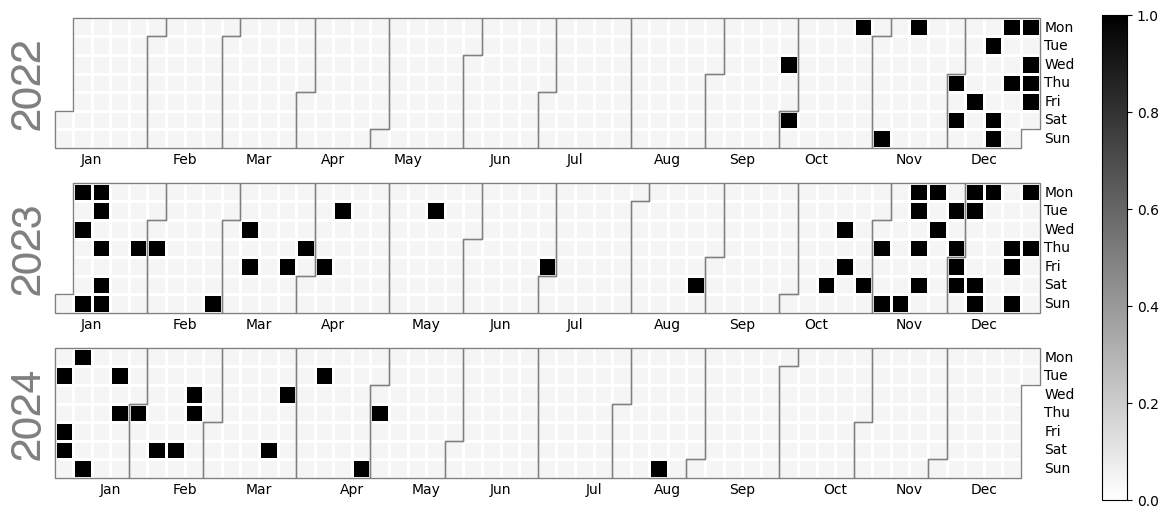

In [15]:
stats_dict = plot_calplot(year, 'BuAre_sum', 300, fraction_of_night=0.1)

In [ ]:
for i in ['BuAre_sum', 'BuVol_3D_sum', 'BuEWA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','SVF_3D_mean', 'BuERI_mode', 'StrClo400_median']:
    print(i)
    stats_dict = plot_calplot(year, i, 300, fraction_of_night=0.1)